# Librerías y cosas útiles

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import agente_laberinto_cuartos 
import ambiente_laberinto_cuartos 

import sys 
sys.path.append('..')

import learner_qlearning 

In [21]:
from matplotlib import pyplot as plt
import matplotlib.lines as lines
from matplotlib import colors
import pandas as pd 
import numpy as np 
import pickle 

In [4]:
def get_right_orger_matrix(matrix: np.array) -> np.array:
    dimension = len(matrix)
    right_order_matrix = np.zeros((dimension, dimension))

    for i in range(dimension): 
        for j in range(dimension): 
            right_order_matrix[i,j] = matrix[dimension - i - 1, j]
    return right_order_matrix

In [5]:
def get_values_from_qvalues(q_values):
    values = {}
    state_action_value = [(k[0], k[1], v) for k, v in q_values.items()]
    df = pd.DataFrame(state_action_value, columns = ['state', 'action', 'qvalue'])

    for s in df.state.unique():
        df_s = df.loc[(df.state == s)]
        qvalue_s = df_s.loc[df_s.qvalue == df_s.qvalue.max()].iloc[0].qvalue
        values[s] = round(qvalue_s,2) 
        
    return values

In [199]:
def paint_board_with_values(board, values, path = None):
    dimension = len(board)

    fig = plt.figure(figsize=(dimension+2, dimension))
    right_order_board = get_right_orger_matrix(board)

    heatmap = plt.pcolor(right_order_board, alpha=0.7, cmap = 'seismic')
    plt.colorbar(heatmap)

    plt.grid(which="both", color="black", linestyle='-', linewidth=0.2)
    fig.add_artist(lines.Line2D([0.416, 0.416], [0.79, 0.98], color = 'black',linewidth=2))
    fig.add_artist(lines.Line2D([0.416, 0.416], [0.04, 0.225], color = 'black',linewidth=2))
    fig.add_artist(lines.Line2D([0.416, 0.416], [0.317, 0.7], color = 'black',linewidth=2))

    fig.add_artist(lines.Line2D([0.04, 0.185], [0.511, 0.511], color = 'black',linewidth=2))
    fig.add_artist(lines.Line2D([0.264, 0.565], [0.511, 0.511], color = 'black',linewidth=2))
    fig.add_artist(lines.Line2D([0.65, 0.795], [0.511, 0.511], color = 'black',linewidth=2))

    plt.grid(which="both", color="black", linestyle='-', linewidth=0.2)
    plt.xticks(range(dimension))
    plt.yticks(range(dimension), range(dimension, 0, -1))

    for i in range(dimension):
        for j in range(dimension):
            try:  plt.text(j + 0.2, dimension - 1 - i + 0.4, values[i,j], fontsize = 'x-large')
            except: continue

    fig.tight_layout()
    if not path is None: plt.savefig(path)
    plt.show()
    plt.close()

    return fig 

In [7]:
def get_policy_from_qvalues(q_values):
    policy = {}
    state_action_value = [(k[0], k[1], v) for k, v in q_values.items()]
    df = pd.DataFrame(state_action_value, columns = ['state', 'action', 'qvalue'])

    for s in df.state.unique():
        df_s = df.loc[(df.state == s)]
        action_s = df_s.loc[df_s.qvalue == df_s.qvalue.max()].iloc[0].action
        policy[s] = action_s 
        
    return policy

In [187]:
def paint_board_with_policy(board, policy, path = None):
    dimension = len(board)

    fig = plt.figure(figsize=(dimension+2, dimension))

    right_order_board = get_right_orger_matrix(board)

    heatmap = plt.pcolor(right_order_board, alpha=0.7, cmap = 'seismic')
    plt.colorbar(heatmap)

    plt.grid(which="both", color="black", linestyle='-', linewidth=0.2)
    fig.add_artist(lines.Line2D([0.416, 0.416], [0.79, 0.98], color = 'black',linewidth=2))
    fig.add_artist(lines.Line2D([0.416, 0.416], [0.04, 0.225], color = 'black',linewidth=2))
    fig.add_artist(lines.Line2D([0.416, 0.416], [0.317, 0.7], color = 'black',linewidth=2))

    fig.add_artist(lines.Line2D([0.04, 0.185], [0.511, 0.511], color = 'black',linewidth=2))
    fig.add_artist(lines.Line2D([0.264, 0.565], [0.511, 0.511], color = 'black',linewidth=2))
    fig.add_artist(lines.Line2D([0.65, 0.795], [0.511, 0.511], color = 'black',linewidth=2))

    plt.xticks(range(dimension))
    plt.yticks(range(dimension), range(dimension, 0, -1))


    for i in range(dimension):
        for j in range(dimension):
            try: 
                action = policy[i,j]
                symbol = ''
                if action == 'up': symbol = '↑'
                elif action == 'down': symbol = '↓'
                elif action == 'right': symbol = '→'
                elif action == 'left': symbol = '←'
                elif action == 'exit': symbol = '*'
                plt.text(j + 0.4,dimension - 1 - i + 0.4, symbol, fontsize = 'xx-large')
            except: continue 
    fig.tight_layout()
    if not path is None: plt.savefig(path)
    plt.show()
    plt.close()

    return fig 

# Inicialización de valores

In [9]:
env = ambiente_laberinto_cuartos.LaberintoCuartosAmbiente()
agent = agente_laberinto_cuartos.LaberintoCuartosAgente()

In [10]:
learner = learner_qlearning.QLearning( env = env, agent = agent,  
                            epsilon = 0.8, alpha = 0.4, gamma = 0.9,
                            decrease_alpha = 0.01, exploration_decreasing_decay = 0.01,
                            num_episodes_batch = 200)

# Q - learning

In [11]:
epsilons, alphas, rewards, steps = learner.qlearning()

--> Episode 10. Reward: 0.975. Steps: 27 Epsilon: 0.8. Alpha: 0.4
--> Episode 20. Reward: 0.985. Steps: 17 Epsilon: 0.8. Alpha: 0.4
--> Episode 30. Reward: 0.9139999999999999. Steps: 88 Epsilon: 0.8. Alpha: 0.4
--> Episode 40. Reward: 0.6809999999999998. Steps: 321 Epsilon: 0.8. Alpha: 0.4
--> Episode 50. Reward: 0.8979999999999999. Steps: 104 Epsilon: 0.8. Alpha: 0.4
--> Episode 60. Reward: 0.9109999999999999. Steps: 91 Epsilon: 0.8. Alpha: 0.4
--> Episode 70. Reward: 0.8729999999999999. Steps: 129 Epsilon: 0.8. Alpha: 0.4
--> Episode 80. Reward: 0.994. Steps: 8 Epsilon: 0.8. Alpha: 0.4
--> Episode 90. Reward: 0.8169999999999998. Steps: 185 Epsilon: 0.8. Alpha: 0.4
--> Episode 100. Reward: 0.988. Steps: 14 Epsilon: 0.8. Alpha: 0.4
--> Episode 110. Reward: 0.9119999999999999. Steps: 90 Epsilon: 0.8. Alpha: 0.4
--> Episode 120. Reward: 0.8059999999999998. Steps: 196 Epsilon: 0.8. Alpha: 0.4
--> Episode 130. Reward: 0.7139999999999997. Steps: 288 Epsilon: 0.8. Alpha: 0.4
--> Episode 140.

# Resultados

In [189]:
with open('results/result_laberinto.pickle', 'wb') as handle:
    pickle.dump((learner, env, agent, epsilons, alphas, rewards, steps), handle, protocol=pickle.HIGHEST_PROTOCOL)

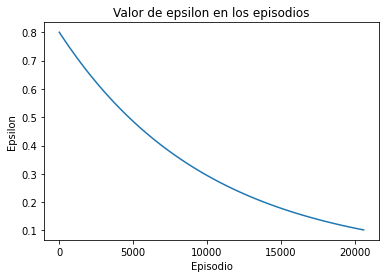

In [192]:
plt.plot(range(1,len(epsilons)*200, 200), epsilons) 
plt.title('Valor de epsilon en los episodios')
plt.xlabel('Episodio')
plt.ylabel('Epsilon')
plt.savefig('results/epsilon.png')

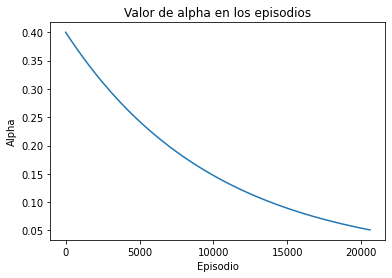

In [193]:
plt.plot(range(1,len(epsilons)*200, 200), alphas)
plt.title('Valor de alpha en los episodios')
plt.xlabel('Episodio')
plt.ylabel('Alpha')
plt.savefig('results/alpha.png')

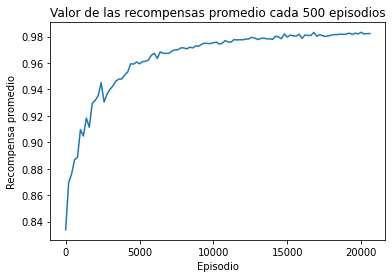

In [194]:
plt.plot(range(1,len(epsilons)*200, 200), rewards)
plt.title('Valor de las recompensas promedio cada 500 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa promedio')
plt.savefig('results/recompensa_promedio.png')

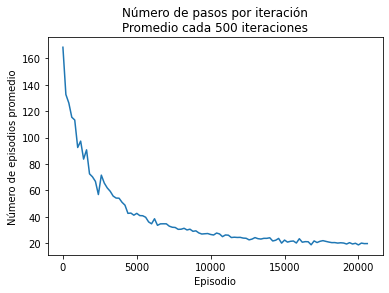

In [195]:
plt.plot(range(1,len(epsilons)*200, 200), steps)
plt.title('Número de pasos por iteración\nPromedio cada 500 iteraciones')
plt.xlabel('Episodio')
plt.ylabel('Número de episodios promedio')
plt.savefig('results/numero_pasos_promedio.png')

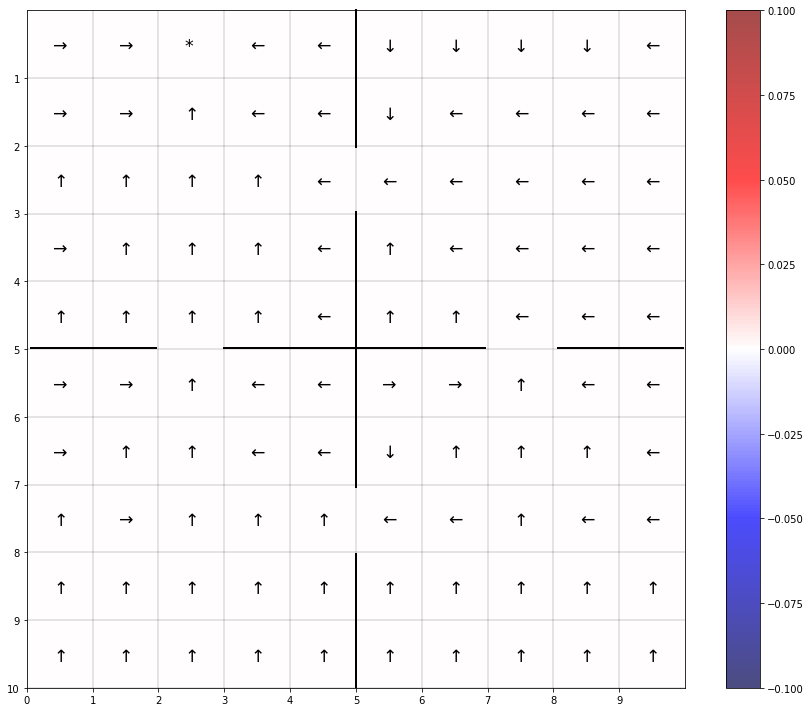

In [196]:
policy = get_policy_from_qvalues(learner.Q)
board = paint_board_with_policy(np.zeros((10,10)),policy, path = 'results/policy.png')

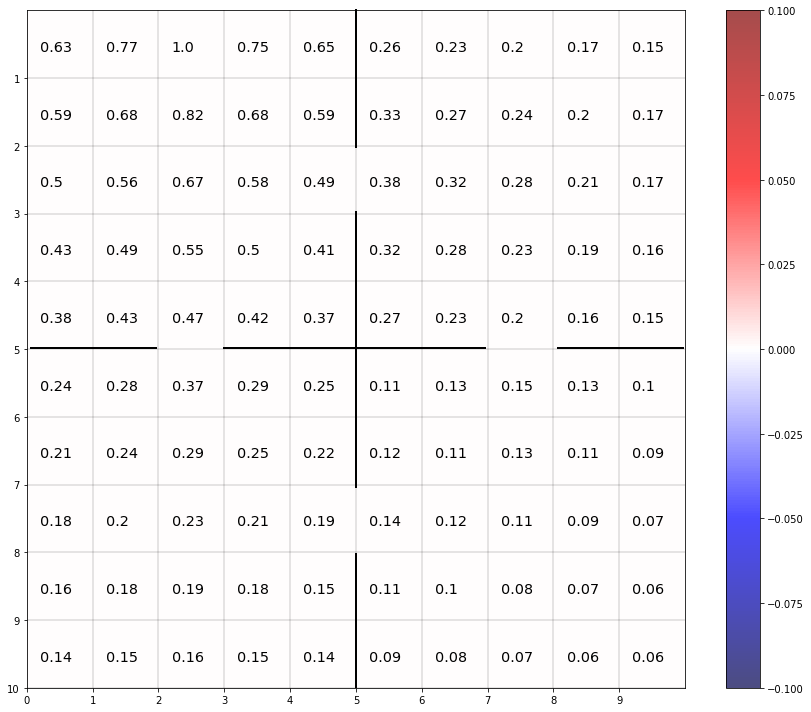

In [200]:
values = get_values_from_qvalues(learner.Q)
fig = paint_board_with_values(np.zeros((10,10)), values, path = 'results/values.png')